In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LOADING THE DATASET


In [6]:
df=pd.read_excel("C:/Users/suchi/Desktop/WIND ENERGY FEASIBILITY/export.xlsx")
df.head()

,DATE,AVG TEMP,MIN TEMP,MAX TEMP,TOTAL PRECIP,SNOW,WIND DIRECTION,AVG WIND SPEED,WIND PEAK GUST,SEA-LEVL AIR PRESSURE,SUNSHINE DURATION
0,2024-01-01 00:00:00,24.0,19.4,29.0,0.0,NaN,36.0,8.3,NaN,1015.4,NaN
1,2024-01-02 00:00:00,23.6,18.8,27.8,0.0,NaN,35.0,9.5,NaN,1015.0,NaN
2,2024-01-03 00:00:00,23.5,19.2,27.0,0.0,NaN,50.0,11.1,NaN,1014.7,NaN
3,2024-01-04 00:00:00,23.7,19.9,27.0,0.0,NaN,45.0,11.5,NaN,1014.6,NaN
4,2024-01-05 00:00:00,23.5,19.7,27.6,0.0,NaN,48.0,14.8,NaN,1014.7,NaN


In [20]:
df.info()

df['DATE'] = pd.to_datetime(df['DATE']).dt.date  # Converts to Python date (still object)
# OR use normalize() if you want to keep it datetime64[ns] with time 00:00:00
df['DATE'] = pd.to_datetime(df['DATE']).dt.normalize()




<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 512
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   490 non-null    datetime64[ns]
 1   AVG TEMP               490 non-null    float64       
 2   MIN TEMP               490 non-null    float64       
 3   MAX TEMP               490 non-null    float64       
 4   TOTAL PRECIP           490 non-null    float64       
 5   WIND DIRECTION         490 non-null    float64       
 6   AVG WIND SPEED         490 non-null    float64       
 7   SEA-LEVL AIR PRESSURE  490 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 34.5 KB


In [8]:
df.describe()

,DATE,AVG TEMP,MIN TEMP,MAX TEMP,TOTAL PRECIP,SNOW,WIND DIRECTION,AVG WIND SPEED,WIND PEAK GUST,SEA-LEVL AIR PRESSURE,SUNSHINE DURATION
count,513,498.000000,497.000000,496.000000,498.000000,0.0,490.000000,490.000000,0.0,490.000000,0.0
mean,2024-09-13 00:00:00,28.090964,23.819920,33.536694,3.151205,NaN,161.142857,9.914490,NaN,1009.081224,NaN
min,2024-01-01 00:00:00,22.800000,15.600000,25.700000,0.000000,NaN,0.000000,4.500000,NaN,997.300000,NaN
25%,2024-05-08 00:00:00,26.300000,21.600000,30.800000,0.000000,NaN,50.000000,7.600000,NaN,1005.425000,NaN
50%,2024-09-13 00:00:00,28.300000,24.300000,33.600000,0.000000,NaN,195.500000,9.500000,NaN,1009.600000,NaN
75%,2025-01-19 00:00:00,29.900000,25.800000,35.600000,1.475000,NaN,262.000000,11.500000,NaN,1012.775000,NaN
max,2025-05-27 00:00:00,34.800000,30.400000,42.600000,110.000000,NaN,358.000000,23.700000,NaN,1018.100000,NaN
std,NaN,2.623286,2.772959,3.540305,9.653240,NaN,105.125478,3.353308,NaN,4.729369,NaN


In [9]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

DATE                       0
AVG TEMP                  15
MIN TEMP                  16
MAX TEMP                  17
TOTAL PRECIP              15
SNOW                     513
WIND DIRECTION            23
AVG WIND SPEED            23
WIND PEAK GUST           513
SEA-LEVL AIR PRESSURE     23
SUNSHINE DURATION        513
dtype: int64

In [10]:
#Drop columns with too many nulls (more than 30%)
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)


In [11]:
df.head()
# we have dropped SNOW,WIND PEAK GUST,SUNSHINE DURATION

,DATE,AVG TEMP,MIN TEMP,MAX TEMP,TOTAL PRECIP,WIND DIRECTION,AVG WIND SPEED,SEA-LEVL AIR PRESSURE
0,2024-01-01,24.0,19.4,29.0,0.0,36.0,8.3,1015.4
1,2024-01-02,23.6,18.8,27.8,0.0,35.0,9.5,1015.0
2,2024-01-03,23.5,19.2,27.0,0.0,50.0,11.1,1014.7
3,2024-01-04,23.7,19.9,27.0,0.0,45.0,11.5,1014.6
4,2024-01-05,23.5,19.7,27.6,0.0,48.0,14.8,1014.7


#FILL NULL VALUES

In [12]:

# Fill temperature and precipitation columns with mean
df['AVG TEMP'] = df['AVG TEMP'].fillna(df['AVG TEMP'].mean())
df['MIN TEMP'] = df['MIN TEMP'].fillna(df['MIN TEMP'].mean())
df['MAX TEMP'] = df['MAX TEMP'].fillna(df['MAX TEMP'].mean())
df['TOTAL PRECIP'] = df['TOTAL PRECIP'].fillna(df['TOTAL PRECIP'].mean())

df['WIND DIRECTION'] = df['WIND DIRECTION'].fillna(df['WIND DIRECTION'].median())
df['AVG WIND SPEED'] = df['AVG WIND SPEED'].fillna(df['AVG WIND SPEED'].median())
df['SEA-LEVL AIR PRESSURE'] = df['SEA-LEVL AIR PRESSURE'].fillna(df['SEA-LEVL AIR PRESSURE'].median())
df.isnull().sum()

DATE                     0
AVG TEMP                 0
MIN TEMP                 0
MAX TEMP                 0
TOTAL PRECIP             0
WIND DIRECTION           0
AVG WIND SPEED           0
SEA-LEVL AIR PRESSURE    0
dtype: int64

BOXPLOT TO VISUALISE OUTLIERS

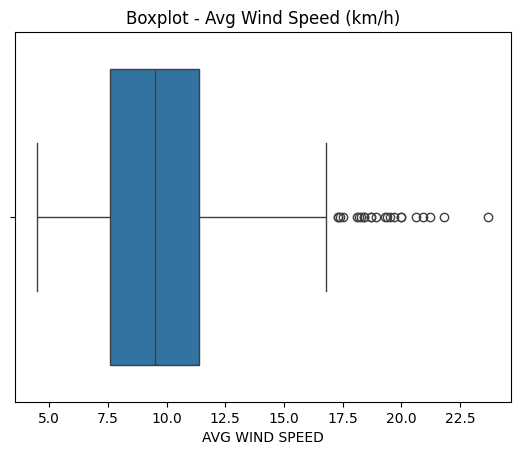

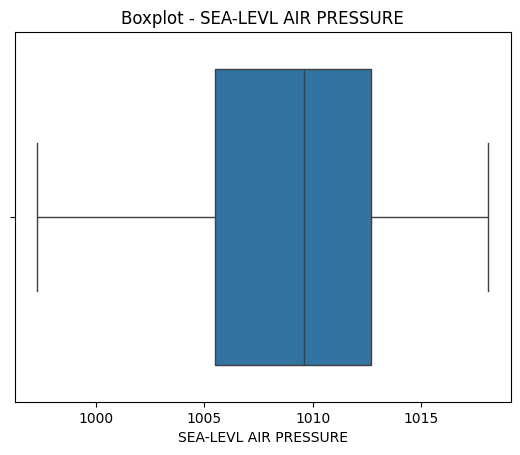

In [13]:
# Check for outliers in wind speed,sea level air pressure
sns.boxplot(x=df['AVG WIND SPEED'])
plt.title("Boxplot - Avg Wind Speed (km/h)")
plt.show()
sns.boxplot(x=df['SEA-LEVL AIR PRESSURE'])
plt.title("Boxplot - SEA-LEVL AIR PRESSURE")
plt.show()





USING IQR METHOD TO REMOVE OUTLIERS IN WIND SPEED AS IT HAS MORE OUTLIERS

In [14]:
Q1=df['AVG WIND SPEED'].quantile(0.25)
Q3=df['AVG WIND SPEED'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['AVG WIND SPEED'] >= lower_bound) & (df['AVG WIND SPEED'] <= upper_bound)]

BOX PLOT AFTER REMOVING OUTLIERS

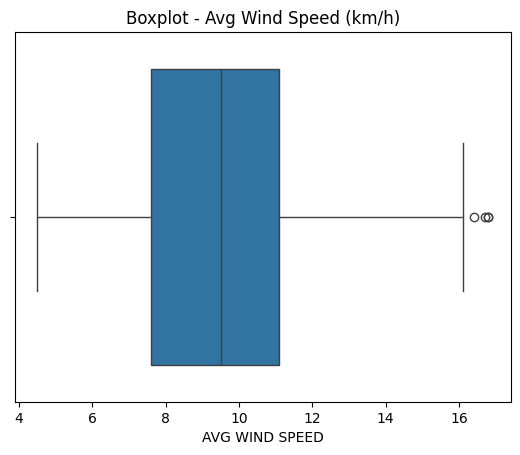

In [15]:
sns.boxplot(x=df['AVG WIND SPEED'])
plt.title("Boxplot - Avg Wind Speed (km/h)")
plt.show()

EXPLORATORY DATA ANALYSIS

Correlation heatmap:

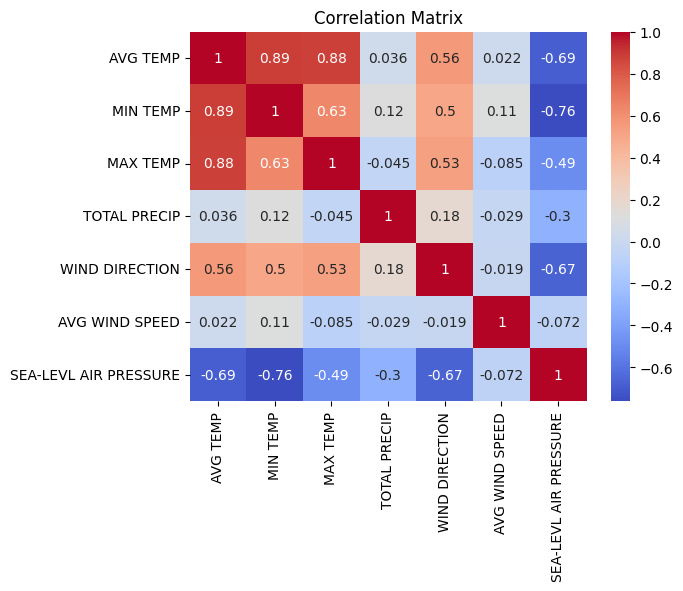

In [16]:

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Line plot for trend:

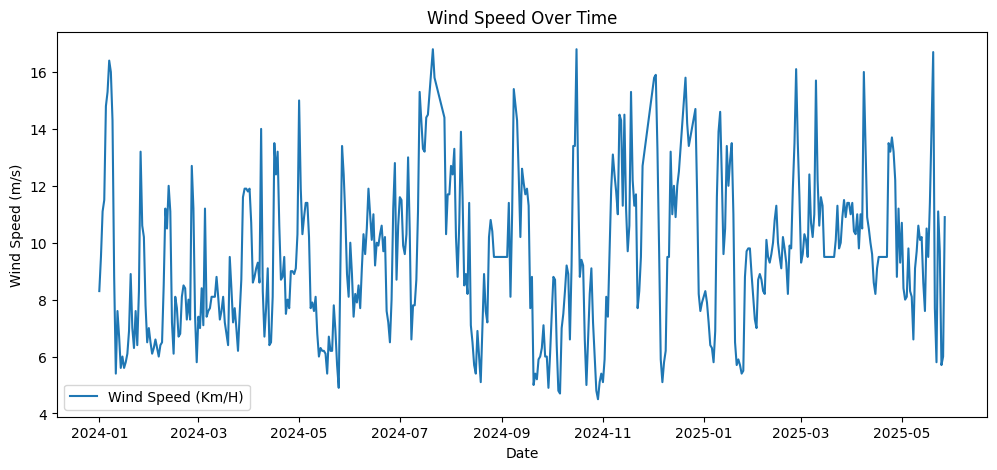

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df['DATE'], df['AVG WIND SPEED'], label='Wind Speed (Km/H)')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()


LINEPLOT: Wind Speed vs Average Temperature

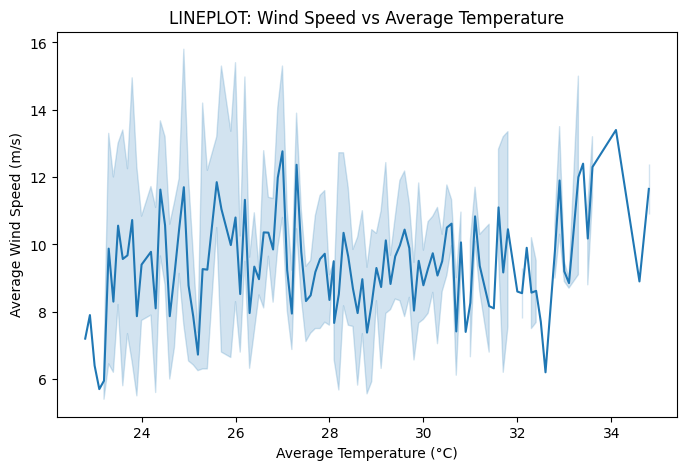

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.lineplot(x='AVG TEMP', y='AVG WIND SPEED', data=df)
plt.title('LINEPLOT: Wind Speed vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Wind Speed (m/s)')
plt.show()



In [19]:
df.to_excel("Kakinada_cleaned_wind_dataset.xlsx",index=False)